# Black Friday DataSet Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Read CSV:

In [2]:
df = pd.read_csv('BlackFriday.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# High Level Analysis 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [4]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [5]:
df.shape

(537577, 12)

In [6]:
df.describe(include=['O'])

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,537577,537577,537577,537577,537577
unique,3623,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1858,405380,214690,226493,189192


# Null Check  

In [7]:
df.isnull()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,False,False,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,False,False,False,False,False,False,False,False,False,False,True,False
537573,False,False,False,False,False,False,False,False,False,False,False,False
537574,False,False,False,False,False,False,False,False,False,False,True,False
537575,False,False,False,False,False,False,False,False,False,True,True,False


In [8]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [9]:
df.shape[0]

537577

In [10]:
df.isnull().sum()/df.shape[0]

User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.310627
Product_Category_3            0.694410
Purchase                      0.000000
dtype: float64

In [11]:
percent = (df.isnull().sum()/df.shape[0])*100
percent = percent.sort_values(ascending=False)
percent

Product_Category_3            69.441029
Product_Category_2            31.062713
Purchase                       0.000000
Product_Category_1             0.000000
Marital_Status                 0.000000
Stay_In_Current_City_Years     0.000000
City_Category                  0.000000
Occupation                     0.000000
Age                            0.000000
Gender                         0.000000
Product_ID                     0.000000
User_ID                        0.000000
dtype: float64

# Null Correction 

In [12]:
# mv = df['Product_Category_3'].mean()
df.fillna(0, inplace=True)

In [13]:
df['Product_Category_3']

0          0.0
1         14.0
2          0.0
3          0.0
4          0.0
          ... 
537572     0.0
537573    16.0
537574     0.0
537575     0.0
537576     0.0
Name: Product_Category_3, Length: 537577, dtype: float64

# Using Label Encoding 

In [14]:
from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()
df['Product_ID'] = la.fit_transform(df['Product_ID'])

df['Gender'] = np.where(df['Gender']=='M',1,0)

df = pd.get_dummies(df)
df.head()

,User_ID,Product_ID,Gender,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_0-17,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,670,0,10,0,3,0.0,0.0,8370,1,...,0,0,1,0,0,0,0,1,0,0
1,1000001,2374,0,10,0,1,6.0,14.0,15200,1,...,0,0,1,0,0,0,0,1,0,0
2,1000001,850,0,10,0,12,0.0,0.0,1422,1,...,0,0,1,0,0,0,0,1,0,0
3,1000001,826,0,10,0,12,14.0,0.0,1057,1,...,0,0,1,0,0,0,0,1,0,0
4,1000002,2732,1,16,0,8,0.0,0.0,7969,0,...,0,1,0,0,1,0,0,0,0,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 24 columns):
User_ID                          537577 non-null int64
Product_ID                       537577 non-null int64
Gender                           537577 non-null int64
Occupation                       537577 non-null int64
Marital_Status                   537577 non-null int64
Product_Category_1               537577 non-null int64
Product_Category_2               537577 non-null float64
Product_Category_3               537577 non-null float64
Purchase                         537577 non-null int64
Age_0-17                         537577 non-null uint8
Age_18-25                        537577 non-null uint8
Age_26-35                        537577 non-null uint8
Age_36-45                        537577 non-null uint8
Age_46-50                        537577 non-null uint8
Age_51-55                        537577 non-null uint8
Age_55+                          537577 non-null uint8
City_

# Feature Engineering:

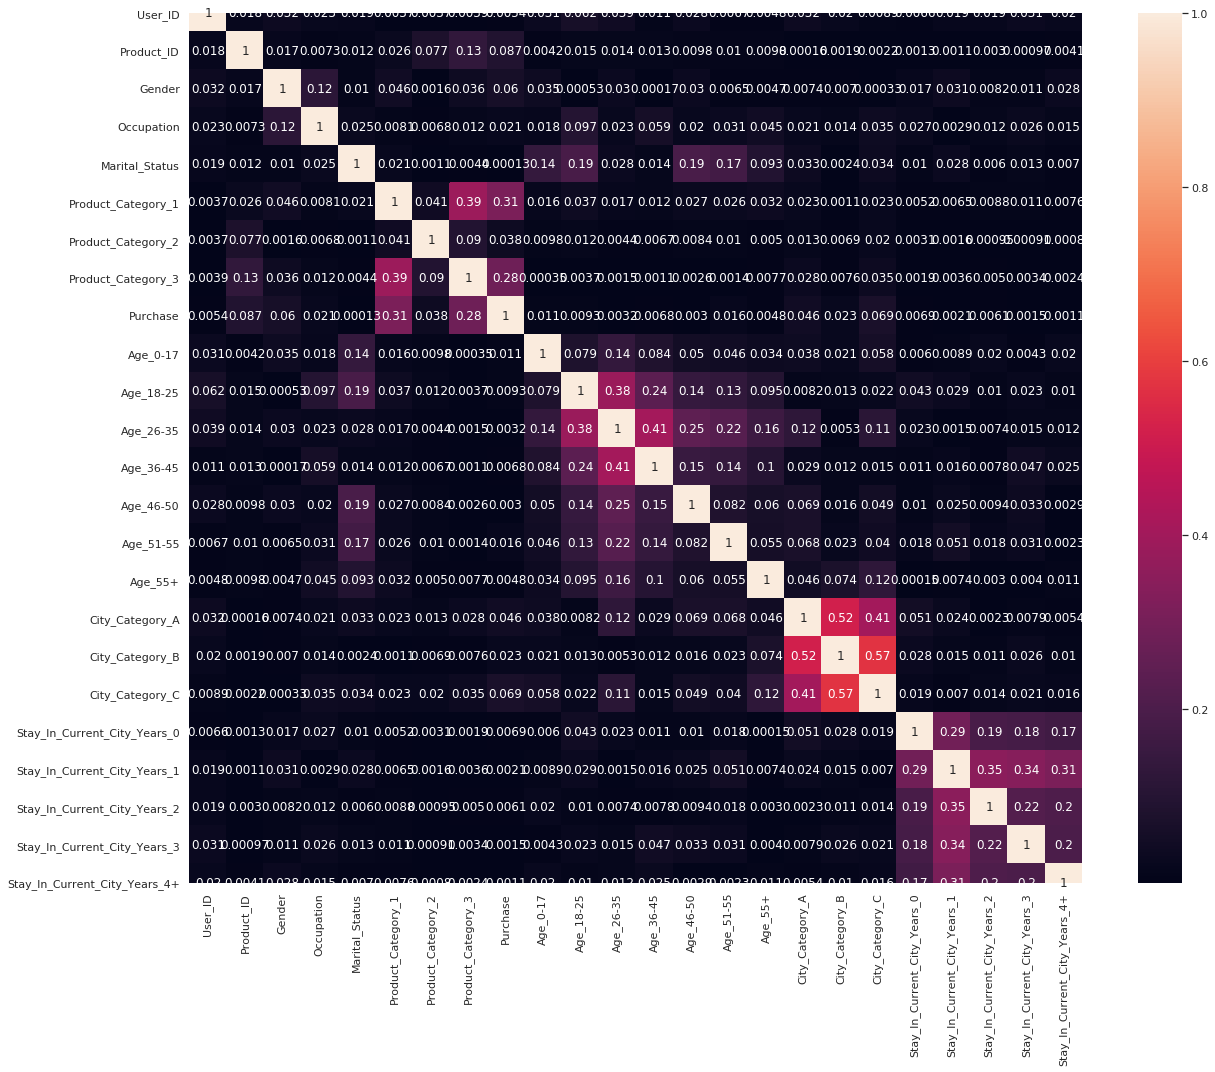

In [16]:
import seaborn as sns
corr = df.corr()
corr = np.abs(corr)
sns.set(rc={'figure.figsize':(20,16)})
hm = sns.heatmap(corr, annot=True)
hm

# Sperated X and Y:

In [17]:
X = df.drop(['Purchase'], axis=1)
y = df['Purchase']

# Train and Test:

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100) 

# Scalling:

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaler = sc.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Baseline Model:

In [20]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100) 
model.fit(X_train,y_train)
model.score(X_test,y_test)

/home/kashif/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.6675476741119158

# Hyperparametr Tuning

In [21]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=1, stop=200, num=4)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(1,50,num=11)]
max_depth.append(None)
min_samples_split = [2,3,5,10]
min_samples_leaf = [1,2,4]
bootstrap = [True,False]
random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'bootstrap':bootstrap  }

rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, cv = 3)
rf_random.fit(X_train,y_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=10, n_jobs=None,
                                                   oob_score=False,
                                                   random_state=None,

In [22]:
model = rf_random.best_estimator_

model.fit(X_train,y_train)
print(model.score(X_test,y_test))
print(y_test[:10])
print(model.predict(X_test[:10]))

0.6977139153641868
158333    23663
360142     7077
513615     5931
479446     1472
146378     1858
529516     2167
211269     7764
279818     8750
55130      8267
206442     7169
Name: Purchase, dtype: int64
[21105.81168099  6835.18019453  5123.41727533  3765.28680033
  6876.99913176  6609.54563194  7626.07322771 12542.86887755
  7319.96193161  6747.52039026]
